# FINAL COURSE PROJECT: TITANIC SURVIVAL DATASET ANALYSIS

In this final project we are going to explore and study the Titanic survival dataset, and structure all the analysis information in a PDF report. These are the sections that we will go through:

- Brief description of the data set and a summary of its attributes

- Initial plan for data exploration

- Actions taken for data cleaning and feature engineering

- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

- Formulating at least 3 hypothesis about this data

- Conducting a formal significance test for one of the hypotheses and discuss the results 

- Suggestions for next steps in analyzing this data

- Quality of this data set and a request for additional data if needed


The dataset can be downloaded ([HERE](https://www.kaggle.com/c/titanic/data?select=train.csv)) 

## STEP 1: Dataset download, description and attributes summary

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

In [ ]:
import kaggle

competition_name = 'titanic'
kaggle.api.competition_download_files(competition_name, path='titanic_data', quiet=False)

100%|██████████| 34.1k/34.1k [00:00<00:00, 4.68MB/s]

In [5]:
import zipfile

# Define the path to the downloaded ZIP file
zip_file_path = 'titanic_data/titanic.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('titanic_data')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('titanic_data/train.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape[0]

891

In [6]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
print(df.describe(include=['object', 'category']))

                       Name   Sex Ticket    Cabin Embarked
count                   891   891    891      204      889
unique                  891     2    681      147        3
top     Dooley, Mr. Patrick  male   1601  B96 B98        S
freq                      1   577      7        4      644


In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
means = df.describe().loc['mean']
medians = df.describe().loc['50%']
quantile_25 = df.describe().loc['25%']
quantile_75 = df.describe().loc['75%']
ranges = df.describe().loc['max'] - df.describe().loc['min']
print(means, medians, quantile_25, quantile_75, ranges)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
Name: mean, dtype: float64 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 50%, dtype: float64 PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 25%, dtype: float64 PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 75%, dtype: float64 PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


In [14]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
25%,223.5,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
median,446.0,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.5,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
range,890.0,1.000000,2.000000,79.580000,8.000000,6.000000,512.329200


| **Attribute**       | **Data Type**   | **Description**                                                                 |
|----------------------|-----------------|---------------------------------------------------------------------------------|
| **PassengerId**      | Numeric         | A unique identifier for each passenger.                                        |
| **Survived**         | Binary (0/1)    | Indicates whether the passenger survived (1 = survived, 0 = did not survive).  |
| **Pclass**           | Categorical     | Passenger class (1 = First, 2 = Second, 3 = Third).                            |
| **Name**             | Text            | Full name of the passenger, often including titles (e.g., Mr., Mrs.).          |
| **Sex**              | Categorical     | Gender of the passenger (male or female).                                      |
| **Age**              | Numeric         | Age of the passenger in years. Some values are missing and need imputation.    |
| **SibSp**            | Numeric         | Number of siblings and/or spouses aboard the Titanic.                          |
| **Parch**            | Numeric         | Number of parents and/or children aboard the Titanic.                          |
| **Ticket**           | Text            | Ticket number, which can include letters and numbers.                          |
| **Fare**             | Numeric         | Fare paid for the ticket.                                                      |
| **Cabin**            | Text            | Cabin number. Many values are missing.                                         |
| **Embarked**         | Categorical     | Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.           |


## STEP 2: Initial plan for Data Exploration

These will be the performed steps in the Data Exploration stage:

    1- General Data Overview
    2- Univariate analysis
    3- Correlation analysis
    4- Log transformation
    5- Handling Duplicates
    6- Missing values
    7- Outliers
    8- Scaling
    9- New variables creation
    10- Encoding categorical features
    11- Feature Selection


## STEP 3: Actions taken for data cleaning and feature engineering

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1- General Data Overview

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape[0]

891

In [ ]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
print(df.describe(include=['object', 'category']))

                       Name   Sex Ticket    Cabin Embarked
count                   891   891    891      204      889
unique                  891     2    681      147        3
top     Dooley, Mr. Patrick  male   1601  B96 B98        S
freq                      1   577      7        4      644


In [17]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64

In [20]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### 2- Univariate Analysis

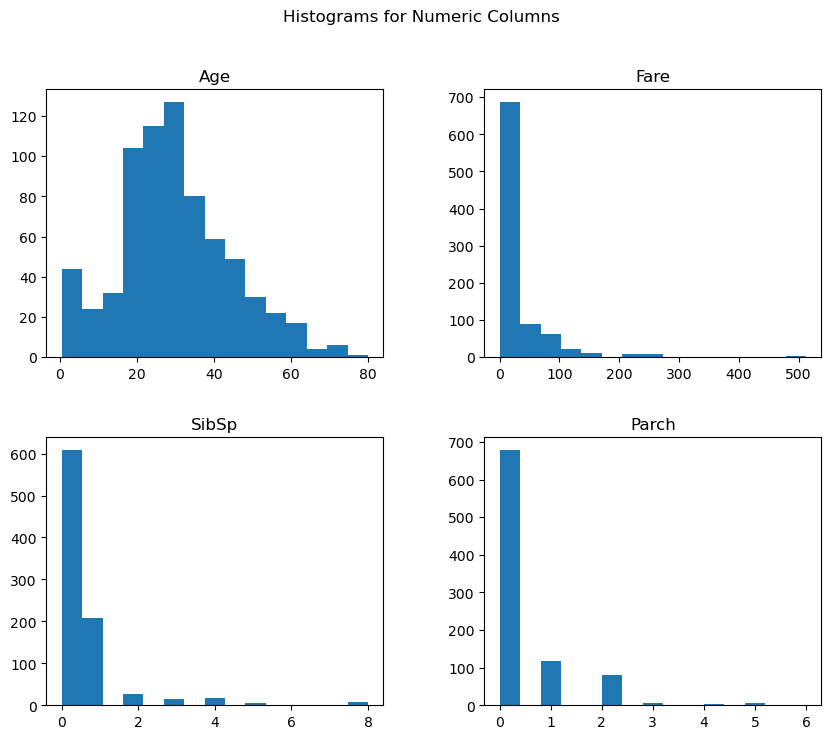

In [30]:
# Plot histograms for numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols].hist(bins=15, figsize=(10, 8), grid=False)
plt.suptitle("Histograms for Numeric Columns")
plt.show()


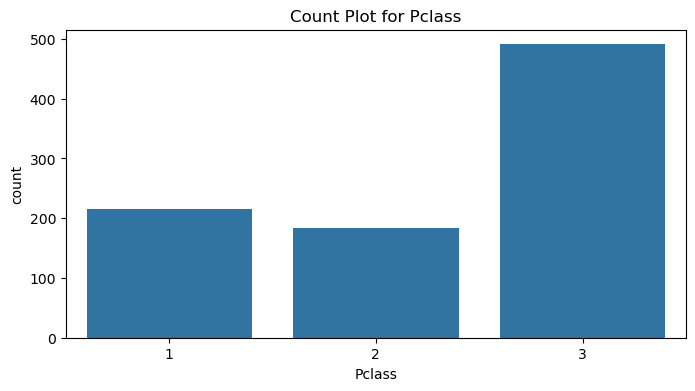

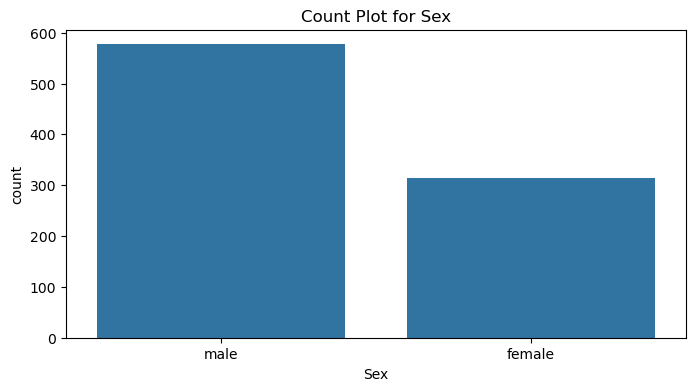

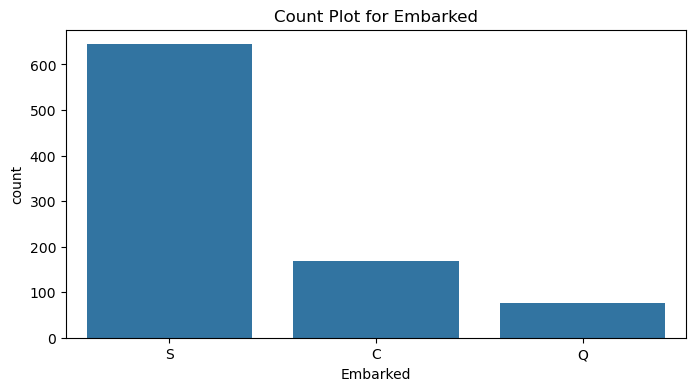

In [32]:
# Plot bar charts for categorical columns
categorical_cols = ['Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot for {col}")
    plt.show()

### 3- Correlation analysis

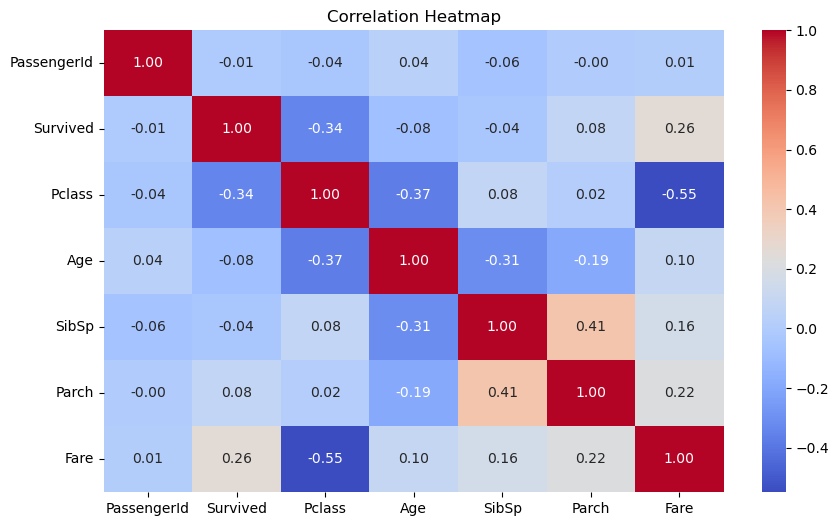

In [34]:
# Correlation heatmap
tit_num = df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(tit_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

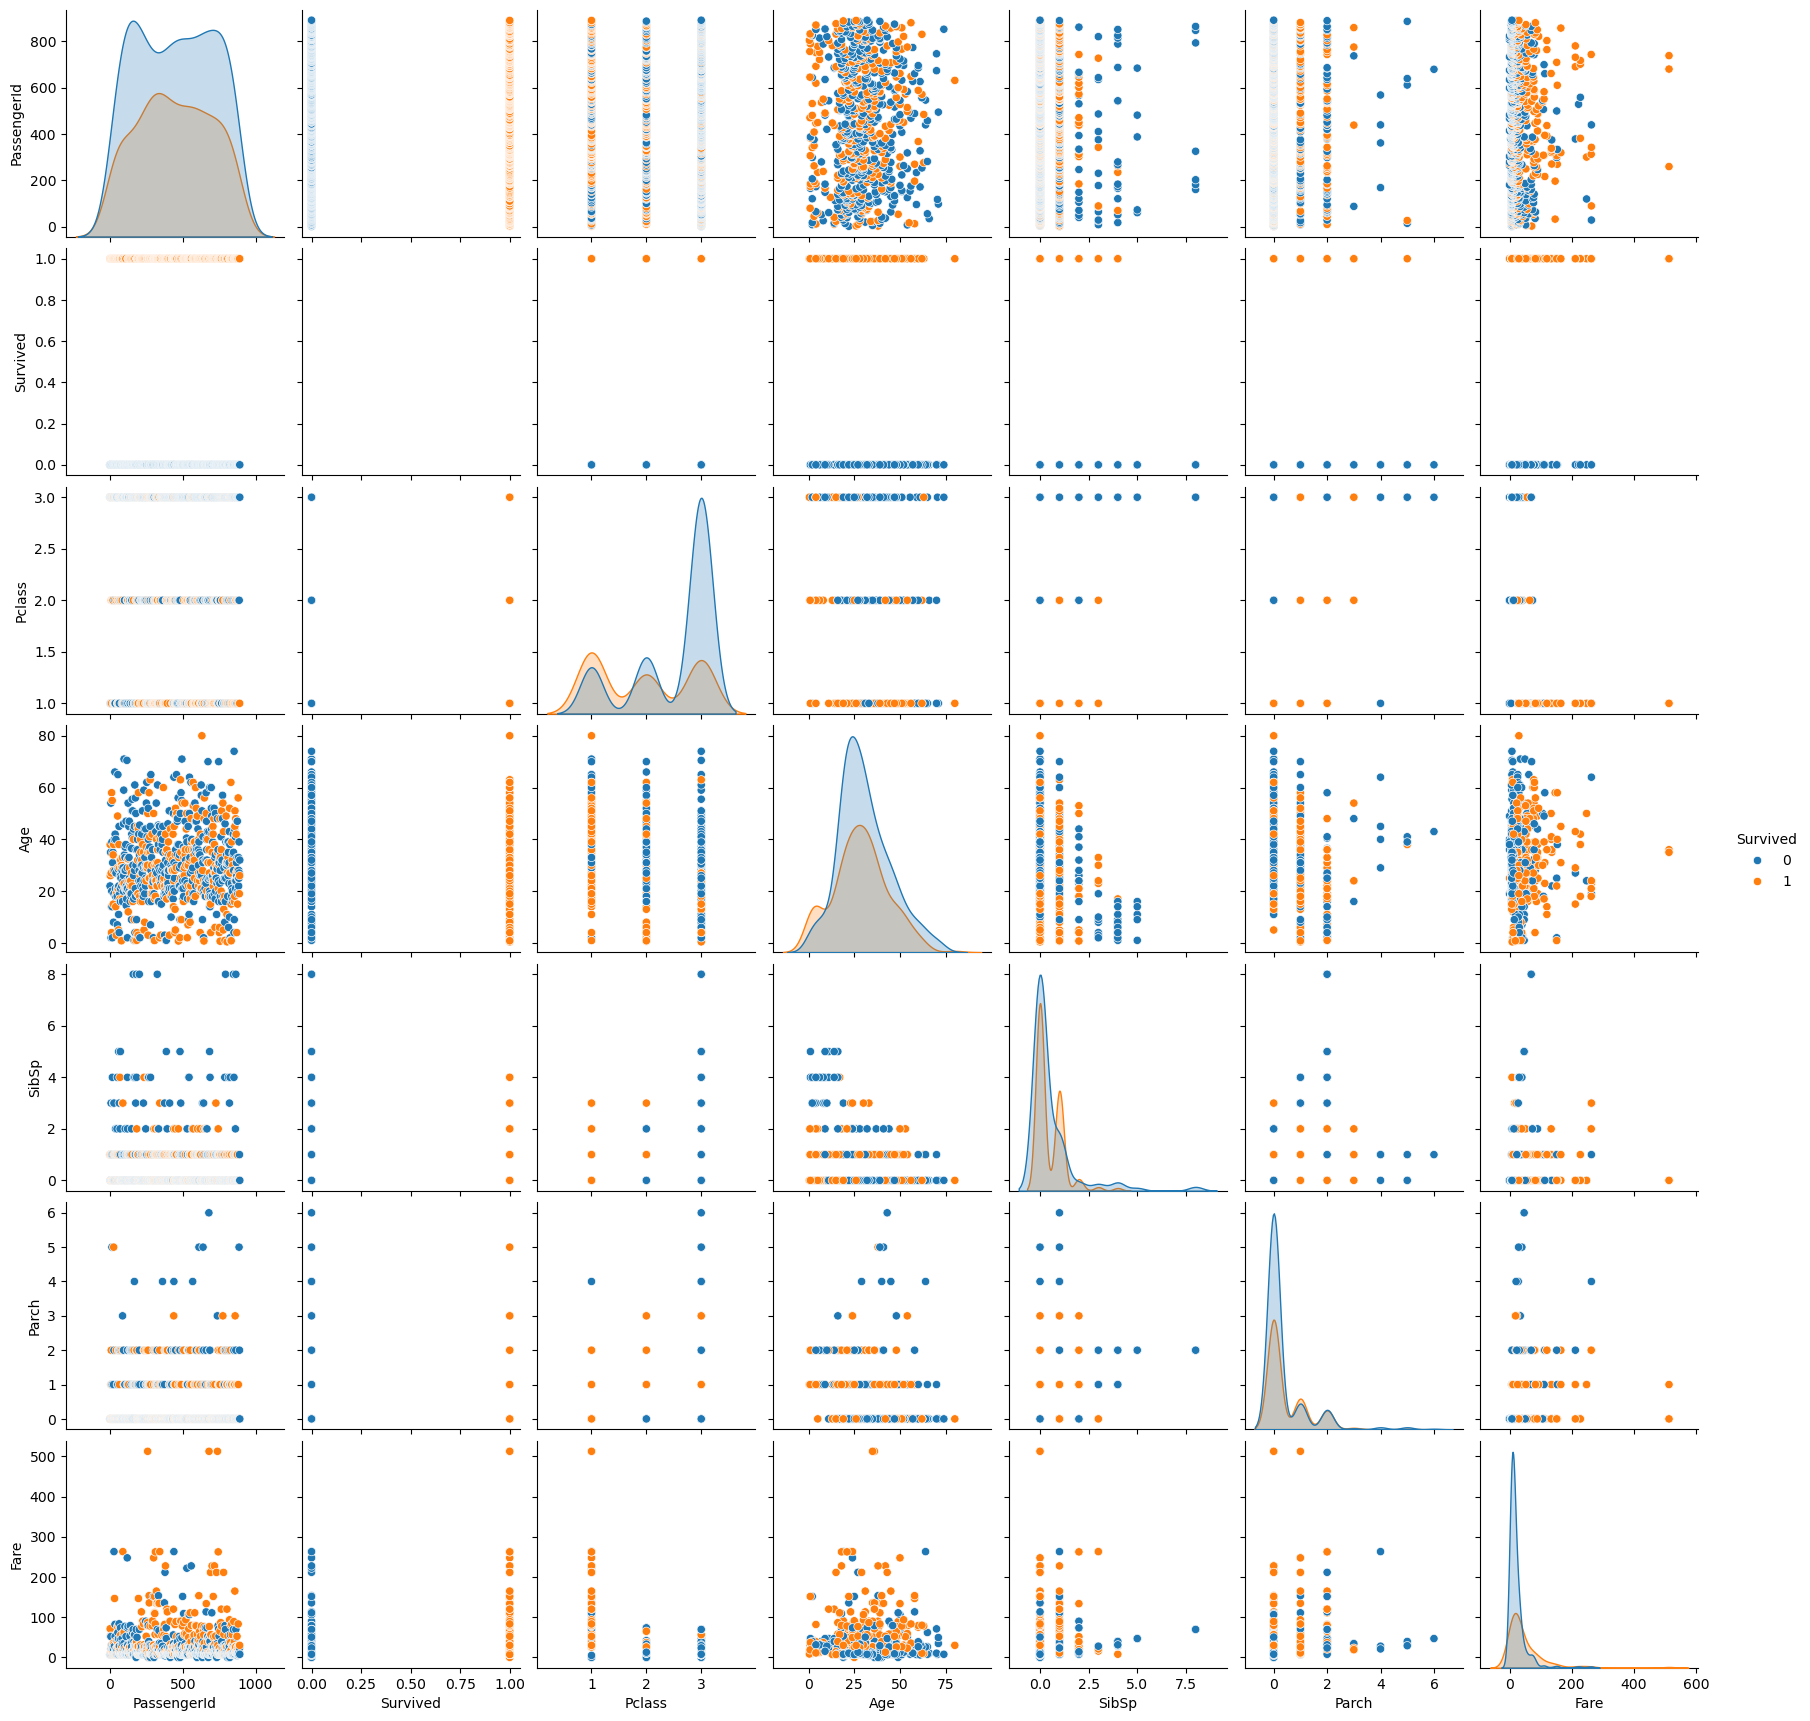

In [46]:
sns.pairplot(df, hue='Survived', vars=numeric_cols.columns)
plt.show()

In [44]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
survived_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print(survived_corr)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


### 4- Log Transformation

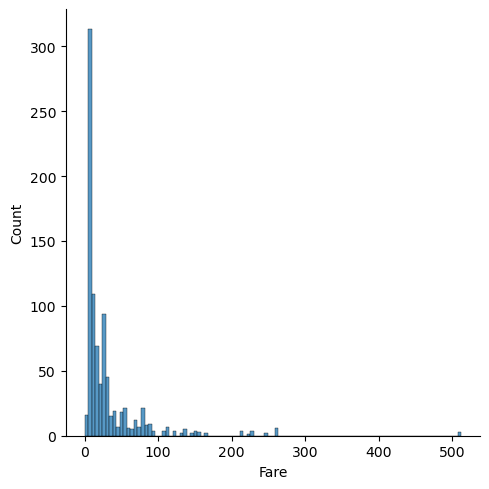

In [6]:
sp_untransformed = sns.displot(df['Fare'])

In [7]:
print("Skewness: %f" % df['Fare'].skew())

Skewness: 4.787317


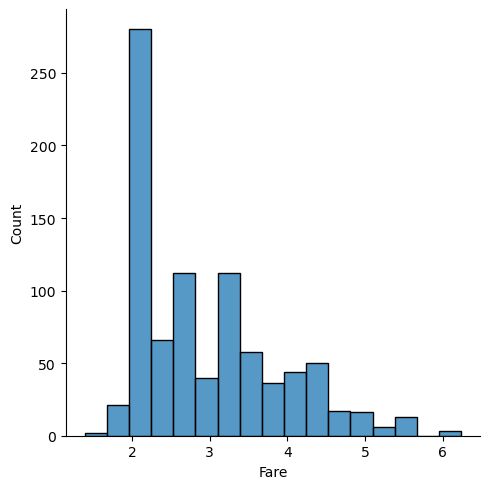

In [10]:
log_transformed = np.log(df['Fare'])
sp_transformed = sns.displot(log_transformed)

In [13]:
df['Fare'] = log_transformed

### 4- Handling Duplicates

In [14]:
duplicate = df[df.duplicated(['PassengerId'])]
duplicate

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 5- Missing Values 

Text(0.5, 1.0, 'Total Missing Values')

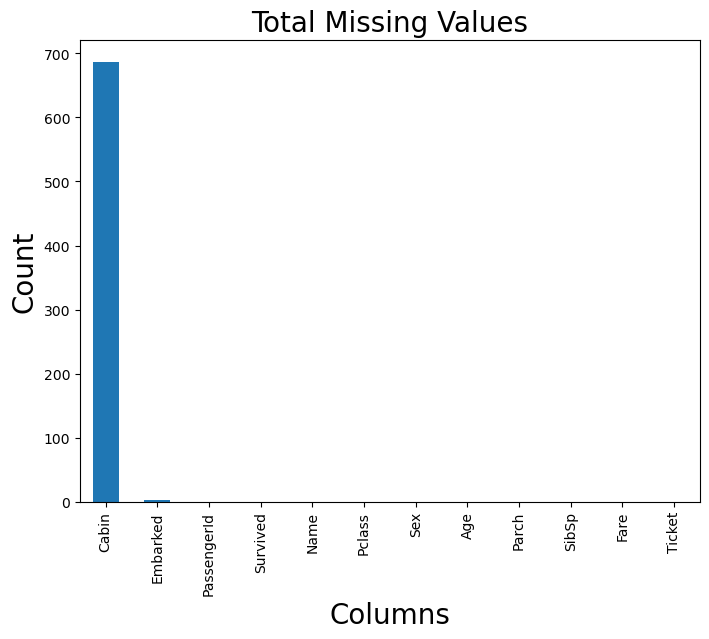

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [18]:
mean = df["Age"].mean()
mean

29.69911764705882

In [19]:
df["Age"].fillna(mean, inplace = True)

/tmp/ipykernel_2378236/1730557404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(mean, inplace = True)


In [21]:
df["Cabin"].fillna(0, inplace = True)

In [39]:
df["Embarked"].fillna('C', inplace = True)

Text(0.5, 1.0, 'Total Missing Values')

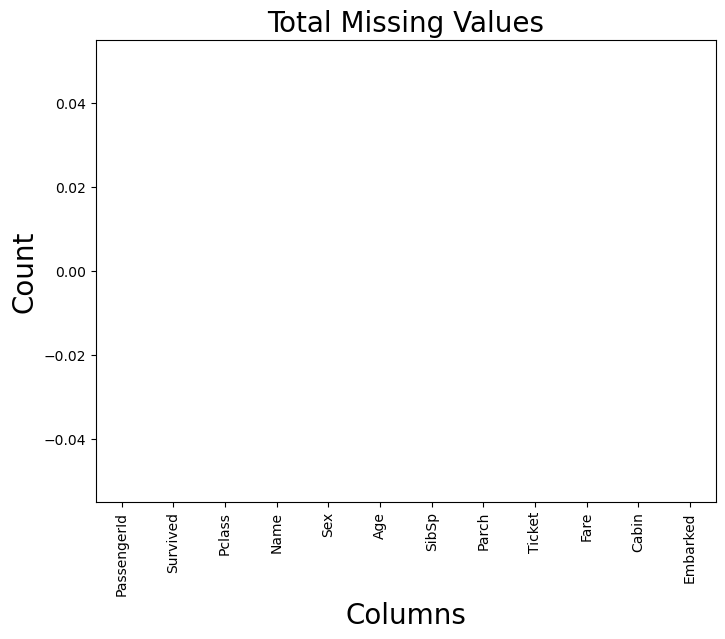

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

### 6- Outliers

<Axes: xlabel='Fare'>

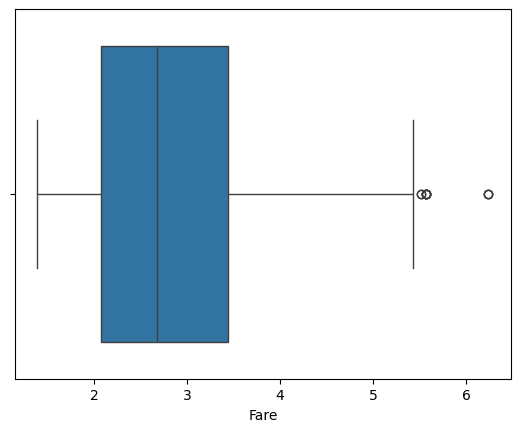

In [25]:
sns.boxplot(x=df['Fare'])

This is real data, the are paid is just bigger than he rest of passengers.

### 7- Scaling

In [30]:
# Check for NaN values
print("NaN values in Fare column:", df['Fare'].isnull().sum())

# Check for infinite values
print("Infinite values in Fare column:", df['Fare'].isin([float('inf'), float('-inf')]).sum())

# Inspect large values
print("Maximum value in Fare column:", df['Fare'].max())

NaN values in Fare column: 0
Infinite values in Fare column: 15
Maximum value in Fare column: 6.238967387173661


In [31]:
# Replace infinite values with a large finite value (e.g., max fare)
df['Fare'].replace([float('inf'), float('-inf')], df['Fare'].max(), inplace=True)

/tmp/ipykernel_2378236/4193003221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].replace([float('inf'), float('-inf')], df['Fare'].max(), inplace=True)


In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
min_max_scaler = MinMaxScaler()  # Scales data to range [0, 1]
standard_scaler = StandardScaler()  # Scales data to mean 0 and standard deviation 1

# Apply scaling to numeric columns
numeric_cols = ['Age', 'Fare']  # Select numeric columns for scaling
df['Age_MinMax'] = min_max_scaler.fit_transform(df[['Age']])
df['Fare_Standard'] = standard_scaler.fit_transform(df[['Fare']])

# Preview scaled values
print(df[['Age', 'Age_MinMax', 'Fare', 'Fare_Standard']].head())

    Age  Age_MinMax      Fare  Fare_Standard
0  22.0    0.271174  1.981001      -0.997611
1  38.0    0.472229  4.266662       1.242540
2  26.0    0.321438  2.070022      -0.910362
3  35.0    0.434531  3.972177       0.953918
4  35.0    0.434531  2.085672      -0.895024


### 8- New variable creation

(a) Family Size
Combine SibSp (siblings/spouses aboard) and Parch (parents/children aboard) to calculate the total family size:

In [33]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Add 1 to include the passenger themselves
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


(b) Title Extraction
Extract titles from passenger names to analyze their influence on survival:

In [34]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


(c) Fare Per Person
Calculate the fare per family member:

In [35]:
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
print(df[['Fare', 'FamilySize', 'FarePerPerson']].head())

       Fare  FamilySize  FarePerPerson
0  1.981001           2       0.990501
1  4.266662           2       2.133331
2  2.070022           1       2.070022
3  3.972177           2       1.986088
4  2.085672           1       2.085672


### 9- Encoding Categorical Features

In [40]:
df['Sex_Encoded'] = df['Sex'].map({'male': 0, 'female': 1})
print(df[['Sex', 'Sex_Encoded']].head())

      Sex  Sex_Encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0


In [42]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Cabin,0,C85,0,C123,0
Embarked,S,C,S,S,S
Title,Mr,Mrs,Miss,Mrs,Mr


In [43]:
# One-hot encode
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# Preview encoded dataframe
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket      Fare  ... Title_Major  Title_Master  \
0      0         A/5 21171  1.981001  ...       False         False   
1      0          PC 17599  4.266662  ...       False         False   
2      0  STON/O2. 3101282  2.070022  ...       False         False   
3      0            113803  3.972177

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           891 non-null    object 
 11  Age_MinMax      891 non-null    float64
 12  Fare_Standard   891 non-null    float64
 13  FamilySize      891 non-null    int64  
 14  FarePerPerson   891 non-null    float64
 15  Sex_Encoded     891 non-null    int64  
 16  Embarked_C      891 non-null    bool   
 17  Embarked_Q      891 non-null    boo

### 10-  Feature Selection

In [48]:
titanic = df.loc[:,['Pclass', 'Sex_Encoded',
       'Age', 'SibSp', 'Parch',
       'Fare', 'Age_MinMax', 'Fare_Standard',
       'FamilySize', 'FarePerPerson', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Survived']]

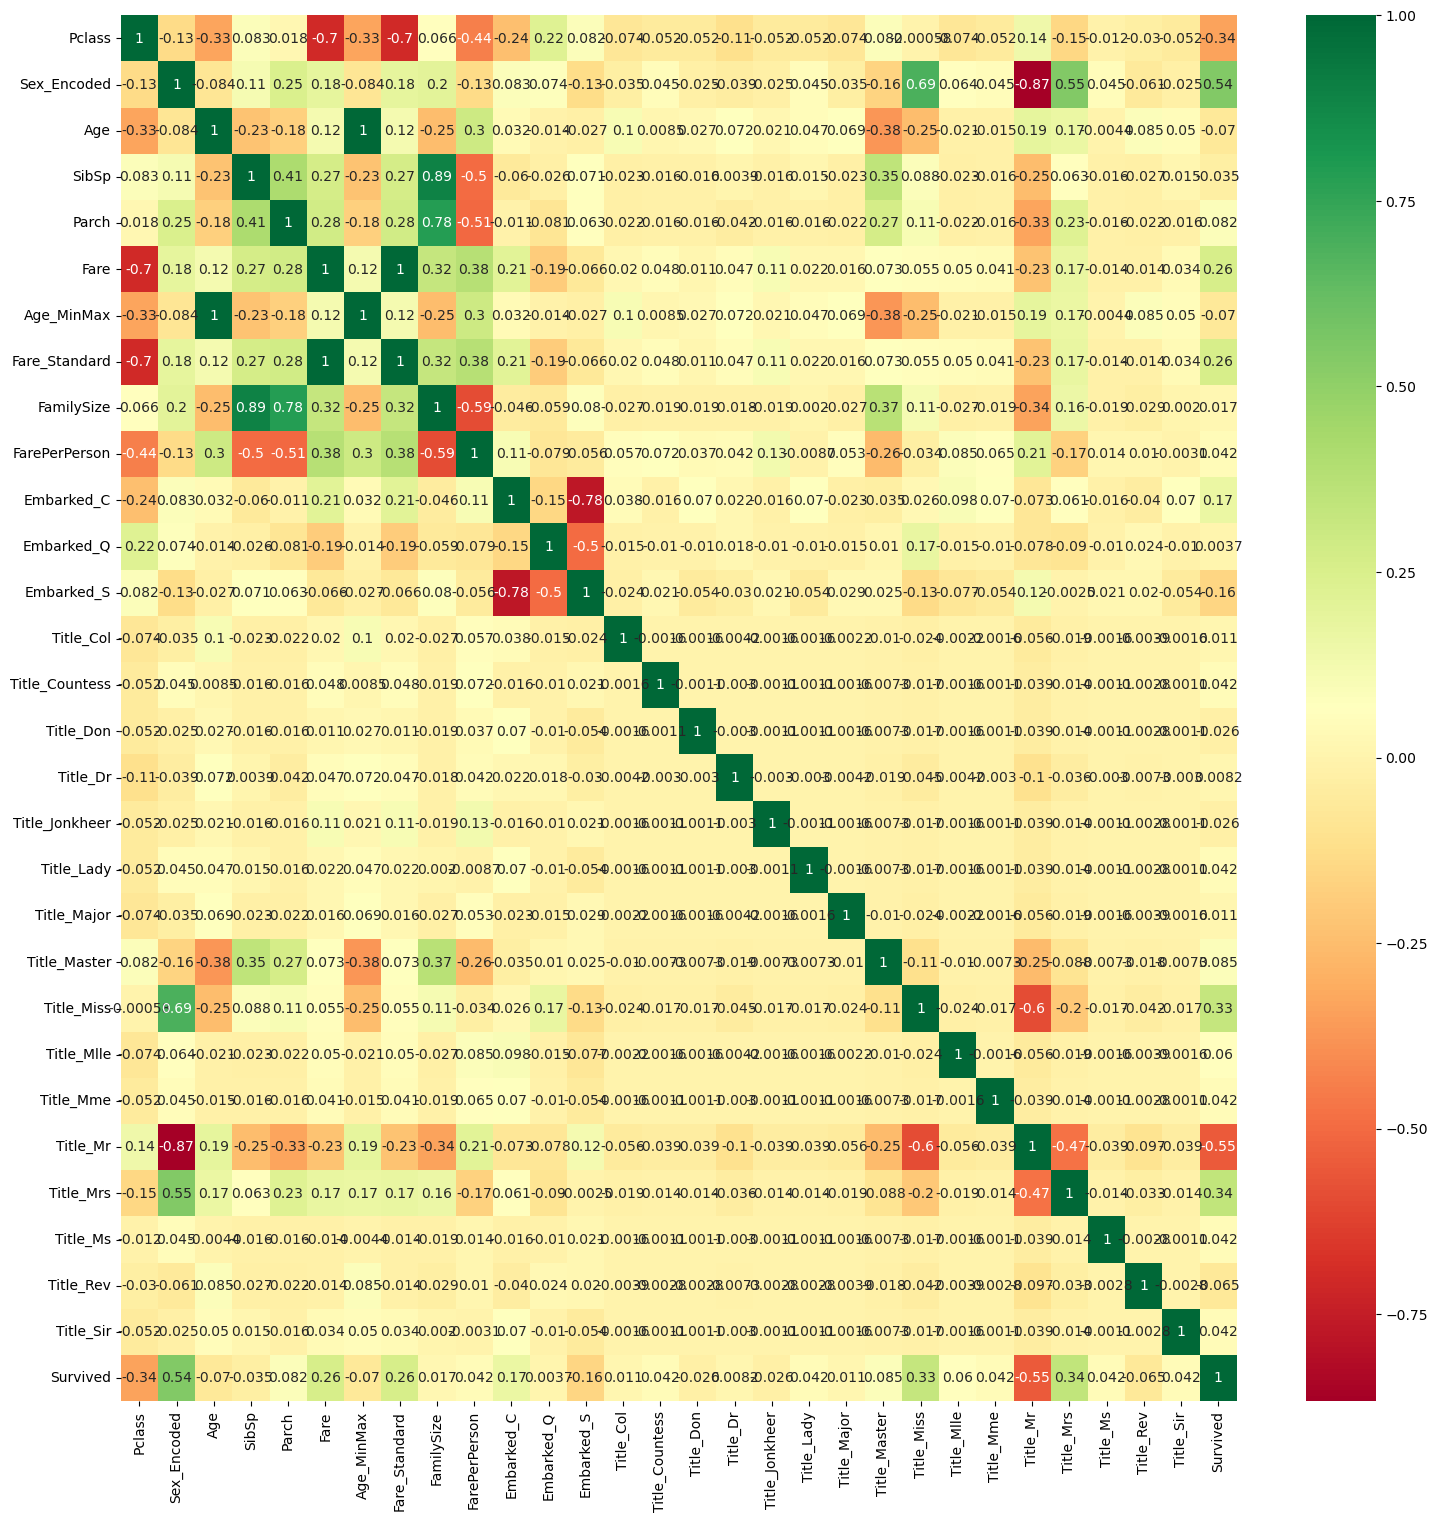

In [49]:
plt.figure(figsize=(18,18))
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn')

plt.show()

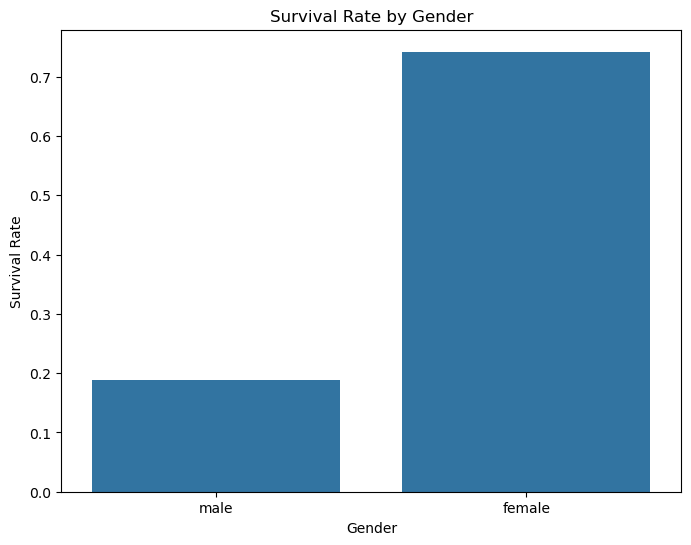

In [54]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Survived', errorbar=None)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

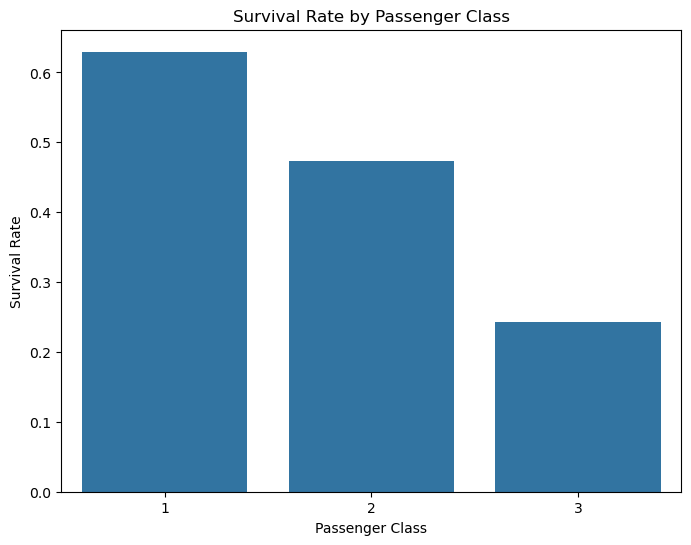

In [53]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived', errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

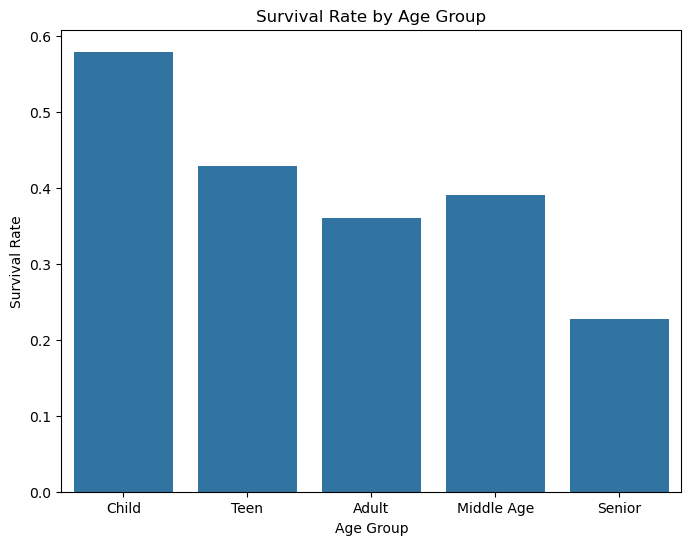

In [55]:
# Bin ages for analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

# Survival rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AgeGroup', y='Survived', errorbar=None)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.show()

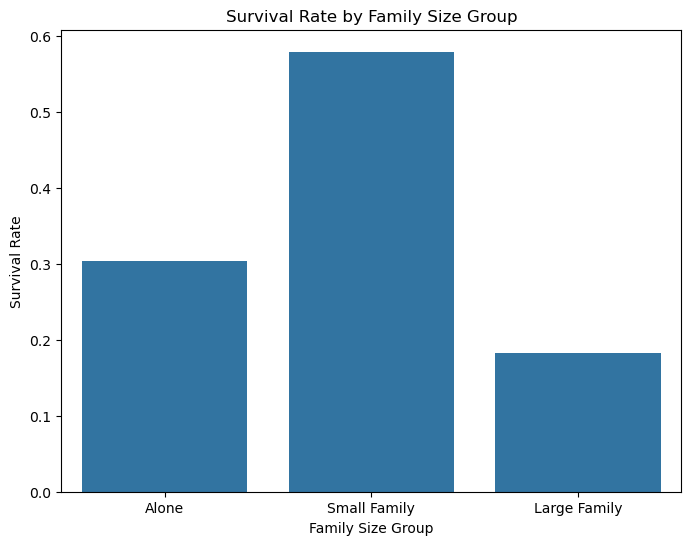

In [56]:
# Bin family sizes for analysis
df['FamilySizeGroup'] = pd.cut(df['FamilySize'], bins=[0, 1, 4, 10], labels=['Alone', 'Small Family', 'Large Family'])

# Survival rate by family size group
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='FamilySizeGroup', y='Survived', errorbar=None)
plt.title("Survival Rate by Family Size Group")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size Group")
plt.show()

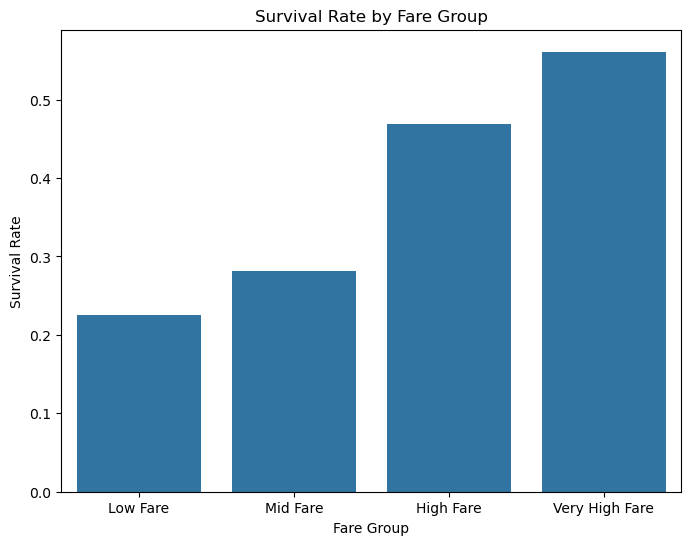

In [57]:
# Bin fares for analysis
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low Fare', 'Mid Fare', 'High Fare', 'Very High Fare'])

# Survival rate by fare group
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='FareGroup', y='Survived', errorbar=None)
plt.title("Survival Rate by Fare Group")
plt.ylabel("Survival Rate")
plt.xlabel("Fare Group")
plt.show()

## STEP 4: Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

#### Synthesis from Exploratory Data Analysis (EDA):

**Correlation**

After the whole EDA, grouping and encoding the variables, we can see that the most correlated features with the survival rate are: Passenger Class, Sex, Age, Family Size and Fare. The Embarked place also had a slightly influence.
The Title is not that important as the gender (The titles applied to women had bigger survival rates than those applied to men)

**Survival Rate by Gender:**

Females had a significantly higher survival rate compared to males.
Gender played a critical role in survival, likely due to the "women and children first" evacuation policy.


**Survival Rate by Passenger Class:**

First-class passengers had a much higher survival rate compared to second-class and third-class.
Socioeconomic status significantly influenced survival chances.


**Survival Rate by Age:**

Children (ages 0–12) had a higher survival rate compared to adults.
Younger passengers had a better chance of survival.


**Impact of Family Size:**

Passengers traveling alone (FamilySize = 1) had a lower survival rate than those with small families (FamilySize = 2–4).
Traveling with family increased survival chances, but very large family groups faced lower survival rates.


**Impact of Fare:**

Passengers who paid higher fares generally had better survival chances.
Fare serves as a proxy for class or cabin quality, further emphasizing the role of socioeconomic factors.

## STEP 5: Formulating 3 hypothesis about this data


**Hypothesis 1 (Gender):**

*Null Hypothesis (H₀)*: Survival is independent of the passenger's gender.

*Alternative Hypothesis (H₁)*: Survival is dependent on the passenger's gender.


**Hypothesis 2 (Passenger Class):**

*Null Hypothesis (H₀)*: Survival rates are the same across all passenger classes.

*Alternative Hypothesis (H₁)*: Survival rates vary across passenger classes.


**Hypothesis 3 (Age):**

*Null Hypothesis (H₀)*: Survival is independent of the passenger's age.

*Alternative Hypothesis (H₁)*: Younger passengers had higher survival rates.


## STEP 6: Conducting a formal significance test for one of the hypotheses and discuss the results

**Hypothesis 1 (Gender):**

*Null Hypothesis (H₀)*: Survival is independent of the passenger's gender.

*Alternative Hypothesis (H₁)*: Survival is dependent on the passenger's gender.

In [60]:
from scipy.stats import chi2_contingency

# Create a contingency table for Gender and Survival
contingency_table = pd.crosstab(df['Sex'], df['Survived'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Gender and Survival are dependent.")
else:
    print("Fail to reject the null hypothesis: Gender and Survival are independent.")

Chi-Square Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Reject the null hypothesis: Gender and Survival are dependent.


## STEP 7: Suggestions for next steps in analyzing this data

### Suggestions for Next Steps in Analyzing This Data

**Incorporate Interaction Effects:**

Study how the interaction between Pclass and Gender influences survival rates.

**Build Predictive Models:**

Train a Machine Learning model to predict survival, using features like Pclass, Sex, Age, and Fare.

**Explore External Data Sources:**

Merge with external datasets, such as ship manifests or historical records, to enrich the analysis.

## STEP 8: A paragraph that summarizes the quality of this data set and a request for additional data if needed

The dataset contains critical variables for survival prediction (e.g., Sex, Pclass, Fare). Data is relatively clean and well-documented.

However, missing values in Age (~20%) and Cabin (~77%) limit analysis and predictive accuracy. Lack of detailed data about passengers’ health or physical conditions.

*Request for Additional Data:*
- Passenger Details: Information about passengers' health, physical conditions, or mobility status.
- Evacuation Process: Data on lifeboat allocation and boarding sequences.
- Crew Details: Adding data on the crew could provide insights into survival rates among different groups on the ship.